## 패키지 불러오기

In [1094]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
%matplotlib inline

In [1095]:
#여러 오류를 만날 수 있기에 무시하기 위해 지정함
import warnings
warnings.filterwarnings("ignore")

In [1096]:
# matplotlib에 사용할 기본 폰트를 지정
from matplotlib import rcParams
rcParams["font.family"] = "Noto Sans KR"
rcParams["axes.unicode_minus"] = False #축에 음수 표현안되면, False 처리해줌

In [1097]:
#한글을 쓰기 위해 지정하기 위한 폰트 검색
import matplotlib.font_manager as fm

#for_font = []
for i in fm.fontManager.ttflist:
    if i.name.find('Noto') != -1:
        if i.weight == 500:
            for_font = i.name

print(for_font)

Noto Sans KR


## 데이터 불러오기

In [1098]:
# 데이터 불러오기 
df_own = pd.read_excel('./data/projects/주간 아파트 매매가격지수_20241026.xlsx')
df_rent = pd.read_excel('./data/projects/주간 아파트 전세가격지수_20241026.xlsx')

In [1099]:
df_own.head(1)

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,99.070849,98.795106,98.501147,98.057422,97.67074,97.354538,96.888385,96.569873,96.149852,...,89.405868,89.439824,89.486678,89.53072,89.566492,89.596423,89.61543,89.641072,89.660654,89.659354


In [1100]:
df_rent.head(1)

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52
0,전국,99.3345,99.026016,98.623536,98.108772,97.557092,97.04603,96.402228,95.848864,95.217212,...,89.550844,89.611102,89.672679,89.736133,89.798015,89.844913,89.879095,89.940154,90.000649,90.056928


서울 관련 데이터만 행 추출

In [1101]:
df_own = df_own.iloc[1:29]

In [1102]:
df_rent = df_rent.iloc[1:29]

## 테이블 합치기 및 flag 컬럼 추가

In [1103]:
#테이블 합치기 위한, flag 컬럼 추가
df_own['gubun'] = 'own'
df_rent['gubun'] = 'rent'

In [1104]:
#형태 확인
df_own.shape

(28, 103)

In [1105]:
#형태 확인
df_rent.shape

(28, 103)

In [1106]:
# 컬럼 같은지 확인
df_own.columns == df_rent.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [1107]:
#합치기 + 형태 확인 + 새로운 df 구성
df_all = pd.concat([df_own, df_rent])
df_all.shape, df_all.head(5), df_all.tail(5)

((56, 103),
       지역명 2022-10-24 00:00:52 2022-10-31 00:00:52 2022-11-07 00:00:52  \
 1      서울            99.18946           98.891016           98.575584   
 2  강북14개구           98.642112           98.340583           98.052583   
 3     종로구          101.272184          101.272184          101.268392   
 4      중구           99.717712           99.436605           99.392767   
 5     용산구          102.497917           102.49509          102.493081   
 
   2022-11-14 00:00:52 2022-11-21 00:00:52 2022-11-28 00:00:52  \
 1            98.21648           97.889642           97.564187   
 2           97.612834            97.32794           97.032485   
 3          101.099196          101.099196          101.058259   
 4           99.293241           98.213935            97.96398   
 5          102.463037          102.336475          102.250486   
 
   2022-12-05 00:00:52 2022-12-12 00:00:52 2022-12-19 00:00:52  ...  \
 1           97.155318           96.809521           96.361279  ...   
 2

## 형변환 및 결측치 처리

In [1108]:
df_all.select_dtypes(include = 'object').columns[1:-1]

# 각 셀을 숫자로 변환하며, 변환 불가 시 NaN 처리
df_all[df_all.columns[1:-1]] = df_all[df_all.columns[1:-1]].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_all


,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
1,서울,99.189460,98.891016,98.575584,98.216480,97.889642,97.564187,97.155318,96.809521,96.361279,...,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462,92.815979,92.886076,own
2,강북14개구,98.642112,98.340583,98.052583,97.612834,97.327940,97.032485,96.620466,96.316564,95.883823,...,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905,89.579069,89.621939,own
3,종로구,101.272184,101.272184,101.268392,101.099196,101.099196,101.058259,101.051544,100.986561,100.986561,...,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792,99.308945,99.309707,own
4,중구,99.717712,99.436605,99.392767,99.293241,98.213935,97.963980,97.632394,97.478444,97.451176,...,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437,95.935588,96.025635,own
5,용산구,102.497917,102.495090,102.493081,102.463037,102.336475,102.250486,102.203613,102.041091,101.868768,...,101.743314,101.803074,102.065775,102.120412,102.342085,102.378964,102.440650,102.607494,102.798632,own
6,성동구,100.275063,99.685047,99.225065,99.123300,98.930362,98.649269,98.335129,98.083811,97.914775,...,95.128594,95.608105,95.860205,95.991732,96.354535,96.467708,96.731720,96.984063,97.065357,own
7,광진구,100.861178,100.549024,100.518260,100.293123,100.041300,99.921116,99.850390,99.657297,99.334308,...,96.639009,96.851756,97.233157,97.400173,97.686736,97.769970,97.897879,98.090594,98.129867,own
8,동대문구,98.068763,97.505763,96.929447,96.496211,96.207370,95.692595,95.202365,94.961852,94.396262,...,87.793899,88.054965,88.293701,88.401392,88.429997,88.492370,88.590702,88.658885,88.684882,own
9,중랑구,99.979866,99.480574,99.436585,99.190377,99.100145,99.002281,98.753650,98.480918,98.303611,...,88.228079,88.280451,88.334176,88.376595,88.395565,88.405568,88.414931,88.430068,88.459074,own
10,성북구,97.447586,96.864403,96.295122,95.783307,95.500192,95.085387,94.598076,94.324834,93.681662,...,86.967129,87.199182,87.364836,87.565626,87.672962,87.798133,87.920718,87.997029,88.032948,own


In [1109]:
#컬럼 전체 str로 형변환
df_all.columns = df_all.columns.astype('str')

## 이상한 컬럼 값 수정

In [1110]:
#temp_list에 df_all 컬럼 담기
temp_list = list(df_all.columns)

#해당 값 인덱스 찾기
find_index = temp_list.index('2024.01.01')
find_index

#datetime으로 수정하기
temp_list[find_index] = pd.to_datetime('2024-01-01 00:00:52', errors = 'ignore')
df_all.columns = temp_list

#확인
df_all.columns[60:80]

Index(['2023-12-25 00:00:52',   2024-01-01 00:00:52, '2024-01-08 00:00:52',
       '2024-01-15 00:00:52', '2024-01-22 00:00:52', '2024-01-29 00:00:52',
       '2024-02-05 00:00:52', '2024-02-19 00:00:52', '2024-02-26 00:00:52',
       '2024-03-04 00:00:52', '2024-03-11 00:00:52', '2024-03-18 00:00:52',
       '2024-03-25 00:00:52', '2024-04-01 00:00:52', '2024-04-08 00:00:52',
       '2024-04-15 00:00:52', '2024-04-22 00:00:52', '2024-04-29 00:00:52',
       '2024-05-06 00:00:52', '2024-05-13 00:00:52'],
      dtype='object')


|지역구|지역구|지역구|지역구|지역구|
|---|---|--|--|--|
|'강남구'|'강동구'|'강북구'|'강서구'|'관악구'|
|'광진구'|'구로구'|'금천구'|'노원구'|'도봉구'|
|'동대문구'|'동작구'|'마포구'|'서대문구'|'서초구'|
|'성동구'|'성북구'|'송파구'|'양천구'|'영등포구'|
|'용산구'|'은평구'|'종로구'|'중구'|'중랑구'



## melt로 날짜 행처리

In [1111]:
#melt해서 보기 쉽게 하기
df_melt = df_all.melt(id_vars = ['지역명','gubun']
            ,var_name = 'date'
            ,value_name = 'ratio')

df_melt

,지역명,gubun,date,ratio
0,서울,own,2022-10-24 00:00:52,99.189460
1,강북14개구,own,2022-10-24 00:00:52,98.642112
2,종로구,own,2022-10-24 00:00:52,101.272184
3,중구,own,2022-10-24 00:00:52,99.717712
4,용산구,own,2022-10-24 00:00:52,102.497917
...,...,...,...,...
5651,관악구,rent,2024-10-21 00:00:52,90.550500
5652,서초구,rent,2024-10-21 00:00:52,90.334929
5653,강남구,rent,2024-10-21 00:00:52,88.985139
5654,송파구,rent,2024-10-21 00:00:52,87.825659


## 연-월 추출

In [1112]:
#date 컬럼을 통해 연/월 컬럼 추가하기
df_melt['when'] = df_melt['date'].astype('str').str[:7]
df_melt

,지역명,gubun,date,ratio,when
0,서울,own,2022-10-24 00:00:52,99.189460,2022-10
1,강북14개구,own,2022-10-24 00:00:52,98.642112,2022-10
2,종로구,own,2022-10-24 00:00:52,101.272184,2022-10
3,중구,own,2022-10-24 00:00:52,99.717712,2022-10
4,용산구,own,2022-10-24 00:00:52,102.497917,2022-10
...,...,...,...,...,...
5651,관악구,rent,2024-10-21 00:00:52,90.550500,2024-10
5652,서초구,rent,2024-10-21 00:00:52,90.334929,2024-10
5653,강남구,rent,2024-10-21 00:00:52,88.985139,2024-10
5654,송파구,rent,2024-10-21 00:00:52,87.825659,2024-10


## 서울만 추출

In [1113]:
#groupby로 원하는 지역 선택
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
df_seoul = df_melt.loc[df_melt['지역명'].isin(seoul_area)]

In [1114]:
df_seoul

,지역명,gubun,date,ratio,when
2,종로구,own,2022-10-24 00:00:52,101.272184,2022-10
3,중구,own,2022-10-24 00:00:52,99.717712,2022-10
4,용산구,own,2022-10-24 00:00:52,102.497917,2022-10
5,성동구,own,2022-10-24 00:00:52,100.275063,2022-10
6,광진구,own,2022-10-24 00:00:52,100.861178,2022-10
...,...,...,...,...,...
5651,관악구,rent,2024-10-21 00:00:52,90.550500,2024-10
5652,서초구,rent,2024-10-21 00:00:52,90.334929,2024-10
5653,강남구,rent,2024-10-21 00:00:52,88.985139,2024-10
5654,송파구,rent,2024-10-21 00:00:52,87.825659,2024-10


## 이상치 확인

In [1115]:
df_seoul.groupby(by = '지역명').describe()
# 서울 데이터 행추리기를 하지 않아서, 중구 / 강서구 row가 너무 많았음.

# 중구/강서구는 서울뿐만아니라, 다른 지역에도 있음

ratio                                                                   \
      count       mean       std        min        25%        50%        75%   
지역명                                                                            
강남구   202.0  91.260111  7.133110  80.261626  83.962816  94.973040  97.196585   
강동구   202.0  89.936238  3.117754  84.475055  88.955509  89.604477  90.533771   
강북구   202.0  89.393955  3.583964  85.049907  87.013080  88.693193  90.627932   
강서구   202.0  90.409083  3.295462  85.503176  88.900336  89.683580  91.765403   
관악구   202.0  88.534938  3.993175  82.754021  85.499529  88.400899  90.142839   
광진구   202.0  91.718836  4.601731  83.923587  87.382763  93.497678  94.231607   
구로구   202.0  88.090183  3.778817  82.342029  85.860102  87.728856  89.201683   
금천구   202.0  91.083462  3.289276  87.204043  88.512909  90.476397  91.945728   
노원구   202.0  87.208282  4.100154  82.337774  84.721376  85.813608  89.012957   
도봉구   202.0  86.912829  4.663903  80.857582  83.555143  85.946978  89.022637   
동대문구  202.0  87.410728  3.558296  82.643807  85.024051  87.097878  88.528190   
동작구   202.0  90.319751  4.212799  82.437567  87.992635  90.512489  92.307182   
마포구   202.0  92.125452  3.751551  84.920420  89.673497  93.055118  94.470018   
서대문구  202.0  91.260426  3.386867  87.944885  88.817395  89.519169  93.338119   
서초구   202.0  92.320369  5.765980  83.479588  86.557435  95.306076  96.419935   
성동구   202.0  91.332140  3.498315  85.903825  88.620756  91.372375  93.283713   
성북구   202.0  85.814531  3.644073  80.367375  83.335808  85.686701  87.117230   
송파구   202.0  89.221658  5.116197  79.677478  85.737998  89.778267  93.323468   
양천구   202.0  91.842556  3.826483  85.294393  88.715477  93.089891  94.668934   
영등포구  202.0  93.977807  2.993473  89.079560  92.356253  93.696740  95.598177   
용산구   202.0  94.365789  6.321204  84.346699  88.065507  98.144551  99.546719   
은평구   202.0  90.138017  3.824663  84.448675  86.879432  90.255420  91.534447   
종로구   202.0  95.789025  3.459658  89.331228  93.228511  97.193540  97.840228   
중구    202.0  91.467619  3.753115  85.278800  87.980711  92.681998  93.322503   
중랑구   202.0  91.386215  3.527864  87.857471  88.657784  90.117068  92.761513   

                  
             max  
지역명               
강남구   103.220143  
강동구    98.769335  
강북구   100.218593  
강서구   100.255155  
관악구    99.073292  
광진구   100.861178  
구로구    99.266560  
금천구   100.632243  
노원구    99.437757  
도봉구   100.965162  
동대문구   98.580461  
동작구    99.979376  
마포구   100.070499  
서대문구   99.178070  
서초구   101.751461  
성동구   100.275063  
성북구    97.447586  
송파구    99.227301  
양천구    99.057958  
영등포구  102.911937  
용산구   102.798632  
은평구   100.003135  
종로구   101.272184  
중구     99.717712  
중랑구   100.064760

In [1116]:
#현재 강서구 
df_own.loc[(df_own['지역명'] == '강서구')]
df_all.loc[(df_all['지역명'] == '마포구')  & (df_all['gubun'] == 'rent')]
df_all.loc[(df_all['지역명'] == '중구')  & (df_all['gubun'] == 'rent')]

,지역명,2022-10-24 00:00:52,2022-10-31 00:00:52,2022-11-07 00:00:52,2022-11-14 00:00:52,2022-11-21 00:00:52,2022-11-28 00:00:52,2022-12-05 00:00:52,2022-12-12 00:00:52,2022-12-19 00:00:52,...,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52,2024-10-14 00:00:52,2024-10-21 00:00:52,gubun
4,중구,98.870586,98.686393,98.649147,98.332346,96.326474,95.756558,94.816725,94.35589,93.859068,...,92.257386,92.275563,92.320068,92.735072,92.780202,92.821343,92.821343,92.841815,92.857078,rent


## 시각화

In [1117]:
df_seoul['date'].str[:7]

2       2022-10
3       2022-10
4       2022-10
5       2022-10
6       2022-10
         ...   
5651    2024-10
5652    2024-10
5653    2024-10
5654    2024-10
5655    2024-10
Name: date, Length: 5050, dtype: object

In [1118]:
df_seoul_groupby = df_seoul.groupby (by = ['지역명','when','gubun'])['ratio'].mean().reset_index()
df_seoul_groupby

,지역명,when,gubun,ratio
0,강남구,2022-10,own,100.695679
1,강남구,2022-10,rent,98.282340
2,강남구,2022-11,own,99.923414
3,강남구,2022-11,rent,97.114531
4,강남구,2022-12,own,99.051832
...,...,...,...,...
1245,중랑구,2024-08,rent,90.693130
1246,중랑구,2024-09,own,88.377976
1247,중랑구,2024-09,rent,91.007960
1248,중랑구,2024-10,own,88.434691


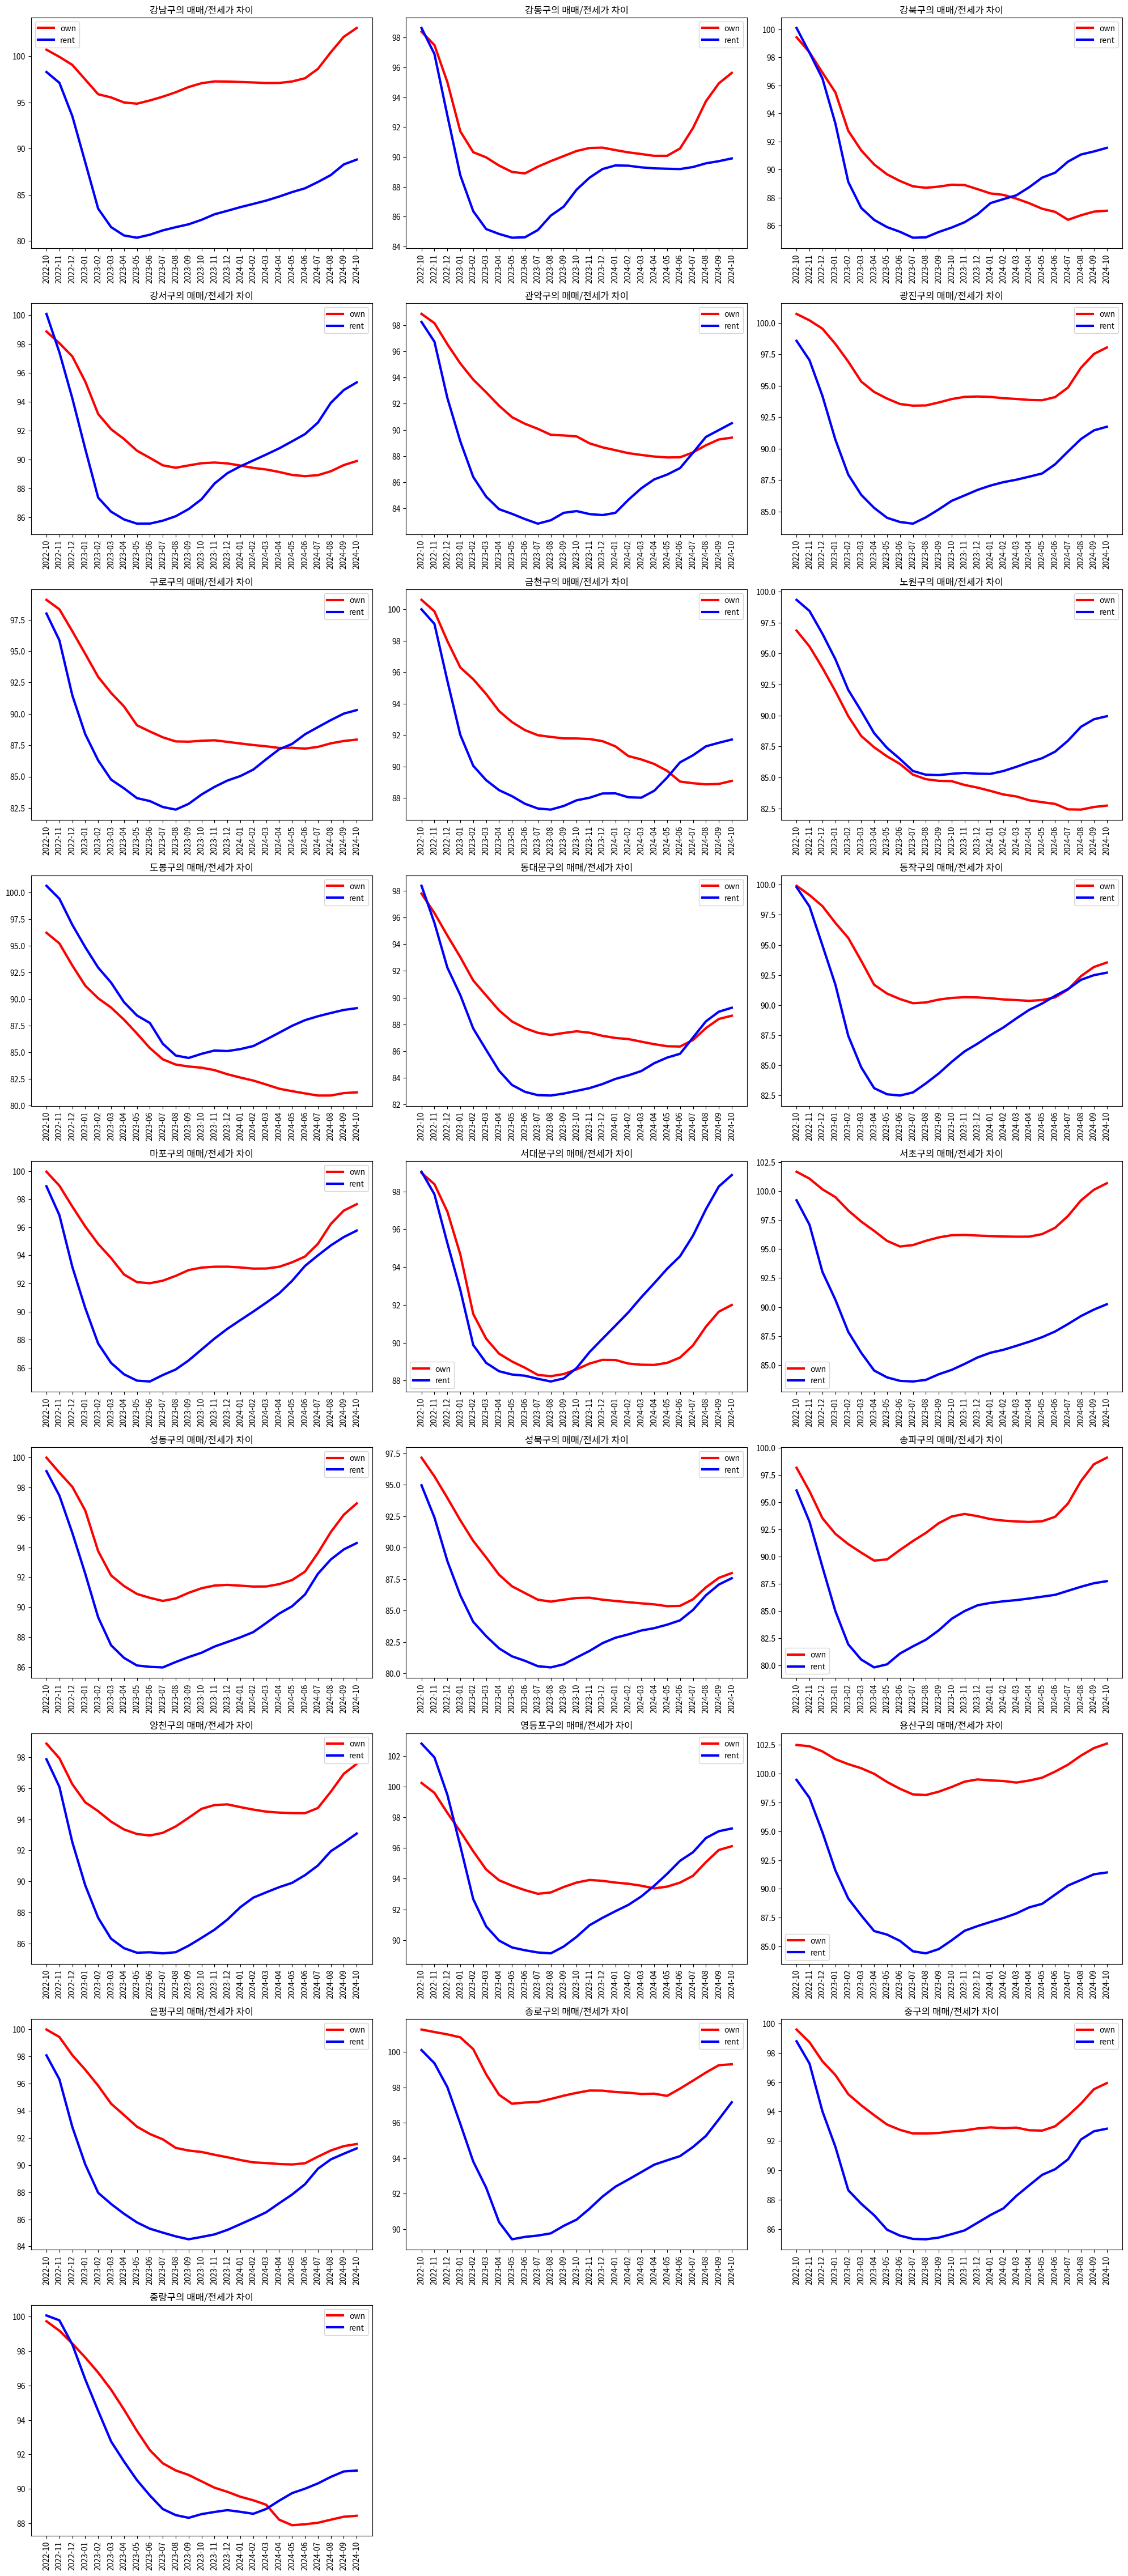

In [1248]:
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
fig = plt.figure(figsize = (20, 50))
for idx, name in enumerate(seoul_area):
    temp_data = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'own')]
    temp_data2 = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'rent')]
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data["when"], temp_data['ratio'], color='red', linewidth = 3)
    axes.plot(temp_data2['when'], temp_data2['ratio'], color='blue', linewidth = 3)
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(name+'의 매매/전세가 차이')
    axes.legend(['own','rent'])

plt.tight_layout()

# 낙차 구하기

In [ ]:
df_seoul

In [ ]:
#gubun을 다시 올리기
df_seoul_groupby_pivot = df_seoul_groupby.pivot_table(index = ['지역명', 'when'], columns = 'gubun', values = 'ratio').reset_index()

df_seoul_groupby_pivot['diff'] = df_seoul_groupby_pivot['own'] - df_seoul_groupby_pivot['rent']

In [ ]:
#낙차 확인
df_seoul_groupby_pivot

#diff가 양수면, 매매가가 전세가 보다 높음

In [ ]:
df_seoul_groupby_pivot

In [ ]:
#diff의 절대값도 구해놓기
df_seoul_groupby_pivot['abs_diff'] = df_seoul_groupby_pivot['diff'].abs()
df_seoul_groupby_pivot

In [ ]:
#지역별로 언제 낙차가 최고, 최소인지 찾기
df_diff_max = df_seoul_groupby_pivot.loc[df_seoul_groupby_pivot.groupby(by = '지역명')['abs_diff'].idxmax(),['지역명','when','diff','abs_diff']]
df_diff_max

In [ ]:
df_diff_min = df_seoul_groupby_pivot.loc[df_seoul_groupby_pivot.groupby(by = '지역명')['abs_diff'].idxmin(),['지역명','when','diff','abs_diff']]
df_diff_min

In [ ]:
df_seoul_groupby


In [1130]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(20, 300))
for idx, name in enumerate(seoul_area):
    #지역명이랑 own 구하기
    temp_data_own = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'own')]
    temp_data_rent = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'rent')]
    
    temp_diff_max = df_diff_max[(df_diff_max['지역명'] == name)]
    temp_diff_min = df_diff_min[df_diff_min['지역명'] == name]
    
    #subplot 관련 설정
    axes = fig.add_subplot(30, 2, idx + 1)
    axes.set_xlabel('월', loc = 'right', fontsize = 30)
    axes.set_ylabel('가격지수', loc = 'top', fontsize = 30)
    axes.set_ylim(ymin = df_seoul['ratio'].min()-30, ymax = df_seoul['ratio'].max()+20)
    axes.yaxis.set_major_locator(MultipleLocator(20))
    axes.tick_params(axis = 'x', rotation = 90, labelsize = 20)
    axes.tick_params(axis = 'y', labelsize = 20)

    
    # 매매 / 전세 트렌트 그래프
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='red', label='매매 (own)', linewidth = 3)
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='blue', label='전세 (rent)', linewidth = 3)

    # 가독성 증진을 위해 선 그어줌
    axes.errorbar(x = temp_diff_max['when'], y = 0, color = '#A400FF', yerr = df_seoul['ratio'].max(), fmt = '|', linewidth = 3)
    axes.errorbar(x = temp_diff_min['when'], y = 0, color = '#3BFF00', yerr = df_seoul['ratio'].max(), fmt = '|', linewidth = 3)

    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(x = temp_diff_max['when'], y = df_seoul['ratio'].min()-30, color='#A400FF', marker='v', s=300, label='최대폭')
    axes.scatter(x = temp_diff_min['when'], y = df_seoul['ratio'].min()-30, color='#3BFF00', marker='v', s=300, label='최소폭')

    #제목 및 범례 조절
    axes.set_title(f'{idx+1}. {name}의 매매/전세 월 트렌드', fontsize = 20)
    axes.legend(fontsize = 30)

    
plt.tight_layout()
plt.show()



# 여기서부터 다시
## 역전세 그래프 찍기

In [1241]:
df_diff_minus = df_seoul_groupby_pivot[df_seoul_groupby_pivot.loc[:,'diff'] < 0]
df_diff_minus['diff']

25    -0.251646
50    -0.662665
67    -0.233374
68    -1.144414
69    -2.218143
         ...   
620   -2.064317
621   -2.284644
622   -2.486242
623   -2.629984
624   -2.625016
Name: diff, Length: 124, dtype: object

In [1242]:
df_diff_minus[df_diff_minus.loc[:,'지역명'] == '강동구']['diff']

25   -0.251646
Name: diff, dtype: object

IndexingError: Too many indexers

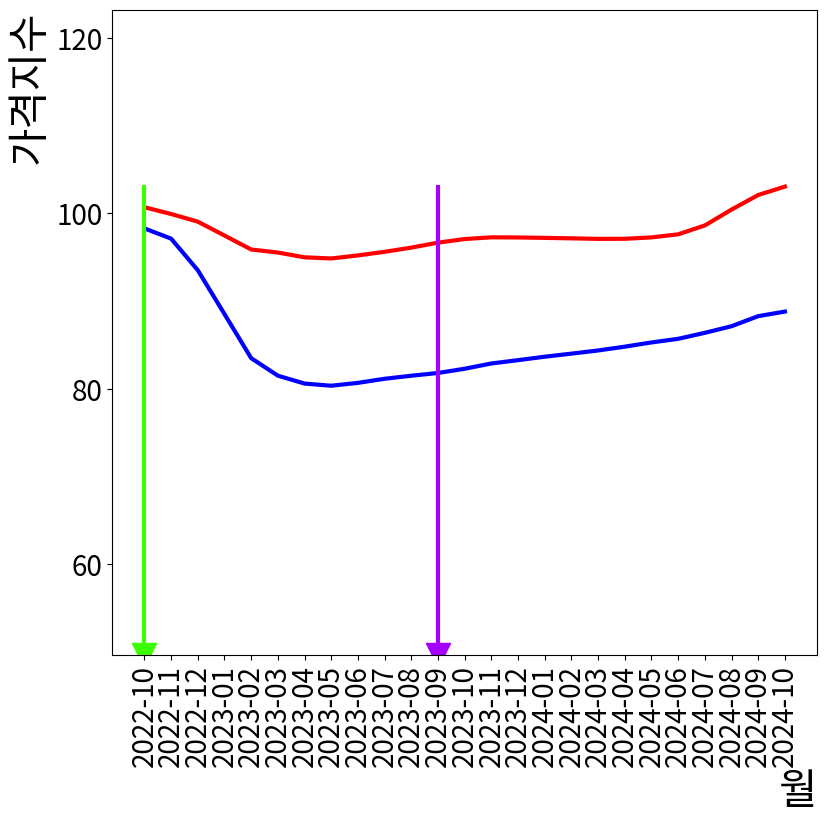

In [1247]:
fig = plt.figure(figsize=(20, 300))
for idx, name in enumerate(seoul_area):
    #지역명이랑 own 구하기
    temp_data_own = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'own')]
    temp_data_rent = df_seoul_groupby[(df_seoul_groupby['지역명'] == name) & (df_seoul_groupby['gubun'] == 'rent')]
    
    temp_diff_max = df_diff_max[(df_diff_max['지역명'] == name)]
    temp_diff_min = df_diff_min[df_diff_min['지역명'] == name]

    #subplot 관련 설정
    axes = fig.add_subplot(30, 2, idx + 1)
    axes.set_xlabel('월', loc = 'right', fontsize = 30)
    axes.set_ylabel('가격지수', loc = 'top', fontsize = 30)
    axes.set_ylim(ymin = df_seoul['ratio'].min()-30, ymax = df_seoul['ratio'].max()+20)
    axes.yaxis.set_major_locator(MultipleLocator(20))
    axes.tick_params(axis = 'x', rotation = 90, labelsize = 20)
    axes.tick_params(axis = 'y', labelsize = 20)

    
    # 매매 / 전세 트렌트 그래프
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='red', label='매매 (own)', linewidth = 3)
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='blue', label='전세 (rent)', linewidth = 3)

    # 가독성 증진을 위해 선 그어줌
    axes.errorbar(x = temp_diff_max['when'], y = 0, color = '#A400FF', yerr = df_seoul['ratio'].max(), fmt = '|', linewidth = 3)
    axes.errorbar(x = temp_diff_min['when'], y = 0, color = '#3BFF00', yerr = df_seoul['ratio'].max(), fmt = '|', linewidth = 3)

    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(x = temp_diff_max['when'], y = df_seoul['ratio'].min()-30, color='#A400FF', marker='v', s=300, label='최대폭')
    axes.scatter(x = temp_diff_min['when'], y = df_seoul['ratio'].min()-30, color='#3BFF00', marker='v', s=300, label='최소폭')


    axes.scatter(x = df_diff_minus['when'], y = df_diff_minus['rent'], color = '#000000', marker = 'o', s = 300)
    
    #제목 및 범례 조절
    axes.set_title(f'{idx+1}. {name}의 매매/전세 월 트렌드', fontsize = 20)
    axes.legend(fontsize = 30)

    

    # axes.scatter(x = temp_diff_min['when'], y = df_seoul['ratio'], color='#3BFF00', marker='o', s=300, label='최소폭')
plt.tight_layout()
plt.show()



## 역전세 그래프 찍기

****************************************************************************************************
최대 : 강남구 2023-10 15.1755318541
최소 : 강남구 2022-10 2.521374186800003
****************************************************************************************************
****************************************************************************************************
최대 : 강동구 2024-10 6.010012136500009
최소 : 강동구 2022-10 0.6172354521999921
****************************************************************************************************
****************************************************************************************************
최대 : 강북구 2023-01 5.599184911899997
최소 : 강북구 2024-02 0.4059608279000031
****************************************************************************************************
****************************************************************************************************
최대 : 강서구 2023-01 7.5443369316
최소 : 강서구 2024-01 0.39904297939999367
******************

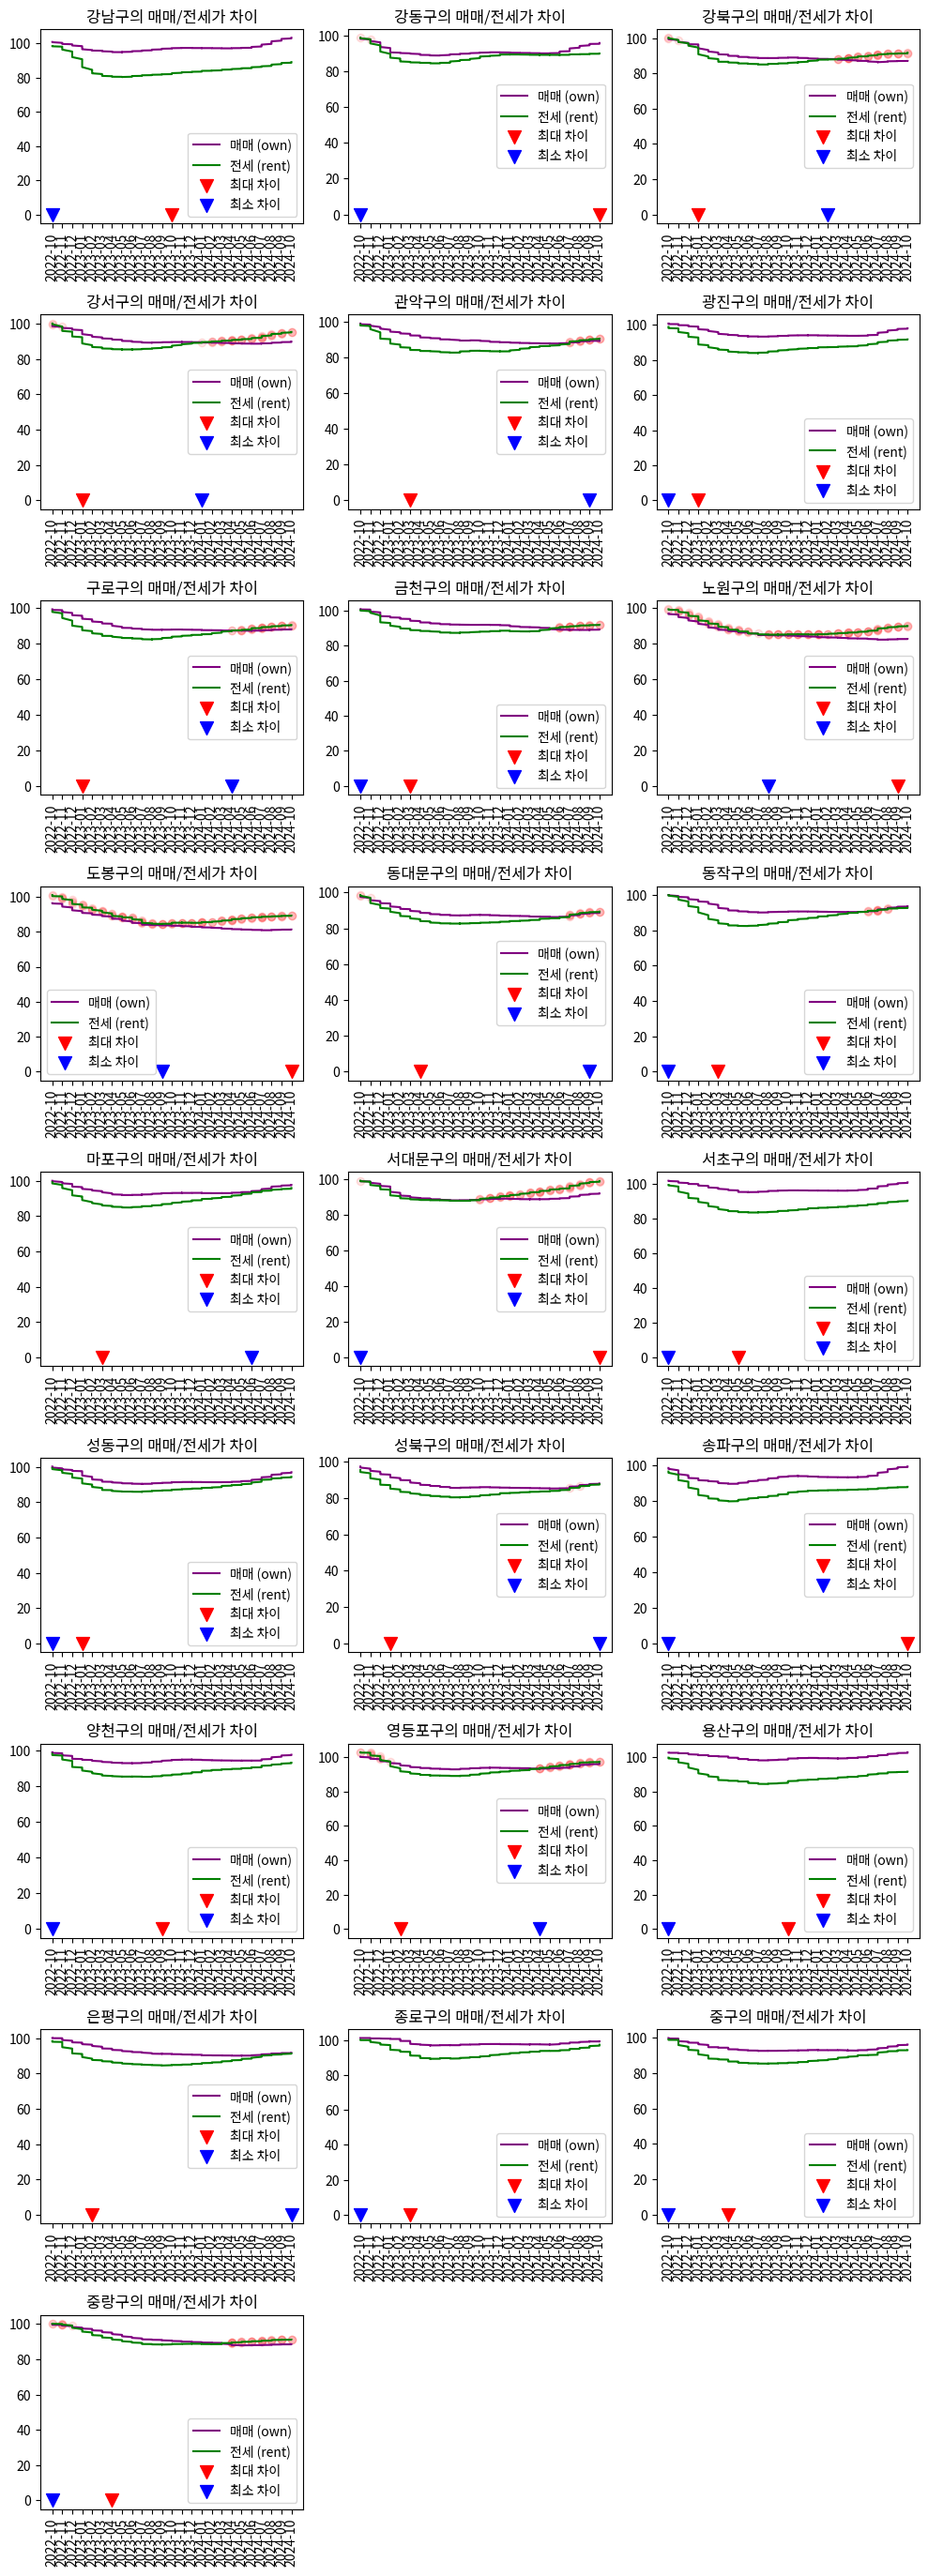

In [1249]:
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
import matplotlib.pyplot as plt

#낙차 계산 df
df_diff = df_seoul.groupby(by=['지역명', 'when'])['ratio'].max().astype('float64') - df_seoul.groupby(by=['지역명', 'when'])['ratio'].min().astype('float64')
df_diff = df_diff.reset_index()
df_diff.rename(columns={'ratio': 'diff'}, inplace=True)
df_diff.sort_values(by='diff', ascending=False, inplace=True)

fig = plt.figure(figsize=(10, 30))
for idx, name in enumerate(sorted(seoul_area)):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data_rent = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    
     #지역명 중에 낙차 max, min 구하기
    max_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]
    min_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=True).iloc[0]

    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    
    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(max_diff_value['when'], y = 0, color='red', marker='v', s=100, label='최대 차이')
    axes.scatter(min_diff_value['when'], y = 0, color='blue', marker='v', s=100, label='최소 차이')

    #계산 확인용
    print(f'{'*'*100}')
    print(f'최대 : {max_diff_value['지역명']} {max_diff_value['when']} {max_diff_value['diff']}')
    print(f'최소 : {min_diff_value['지역명']} {min_diff_value['when']} {min_diff_value['diff']}')
    print(f'{'*'*100}')

    # 역전세 찍기
    for _, row in temp_data_rent.iterrows():
        own_ratio = temp_data_own[temp_data_own["when"] == row["when"]]["ratio"]
        if not own_ratio.empty and row["ratio"] > own_ratio.values[0]:
            # Highlighting with a circle if rent is higher than own
            axes.scatter(row["when"], row["ratio"], color='red', alpha = 0.1, s=100 if idx == 0 else None)
    
    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()


In [ ]:
df_seoul.count()

## 데이터 추가(강북, 강남 집합)

In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 30))
for idx, name in enumerate(sorted(seoul_area_group)):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul_group[(df_seoul_group['지역명'] == name) & (df_seoul_group['gubun'] == 'own')]
    temp_data_rent = df_seoul_group[(df_seoul_group['지역명'] == name) & (df_seoul_group['gubun'] == 'rent')]
   
    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    

    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()


In [ ]:
df_all_numeric = df_all.select_dtypes(include = 'float64')
df_all.groupby(by = '지역명')[df_all_numeric.columns].mean()

In [ ]:
df_all2 = df_all

In [ ]:
df_all = df_all2

In [ ]:
df_all.rename(columns = {'2024.01.01' : '2024-01-01 00:00:52'})
df_all.columns[10:70]              

# 분석보고서

### ▶ 한계
- 전처리가 부족함(서울만 잘라내고 시작했어야했음)
- 낙차 데이터 계산 다시하기

### ▶ 용어 정리
- 전세가율 : 매매가격 대비, 전세가의 비율
- 역전세 : 전세가가 매매가를 넘어서는 현상
- 대상 : 서울 자치구 25개구

### ▶ 데이터
- 매매 주택 가격지수(출처 KB 통계_241026)
- 전세 주택 가격지수(출처 KB 통계_241026)
  가격지수 = 기준시점 대비 조사 시점의 가격 비율(기준시점 : 2022년 1월 10일)
  
- 갭투자 : 최소한의 매매와 전세 차익을 활용하여, 세입자의 전세보증금으로 주택 매수 행위


### 1. 주거비 추이
    1-1) 2022년은 대체로 주거비용(매매, 전세)이 상대적으로 비싼 시기였다.  
    1-2) 2022년 이후 하락세를 보이다가, 2023년 중순부터 서서히 회복하는 추세다.  

### 2. 강북(한강 이북)
|지역구|지역구|지역구|지역구|지역구|
|--|--|--|--|--|
|강북구|광진구|노원구|도봉구|동대문구|
|마포구|서대문구|성동구|성북구|용산구|
|은평구|종로구|중구|중랑구|
    2-1) 하지만, 현재는 갭투자를 할 시기가 아니다.  
    2-2) 역전세가 심해지고 있다. (25개 자치구 중 13개 역전세) 
    2-3) 강북에서 잘못하면, 전세사기꾼 된다.  

### 3. 강남(한강 이남)
|지역구|지역구|지역구|지역구|지역구|
|--|--|--|--|-|
|강남구|강동구|강서구|관악구|구로구|
|금천구|동작구|서초구|송파구|양천구|
|영등포구|    

- 종로구  
2023년 최대를 기점으로 점점 전세가율이 줄어드는 추세

- 중구  
데이터 전처리 추가적으로 필요

- 용산구  
2023년 10월 최대를 기점으로 줄어드는 듯하나 별 차이 없음

- 성동구  
2023년 01월 최대를 기점으로 좁혀지는 듯 보이나, 최근 다시 전세가율이 줄어듬

- 광진구  
2023년 01월 최대를 기점으로 전세가율이 조금씩 늘어나는 모습이지만, 매매와 전세가가 평행함
  
- 동대문구  
최근 전세가율이 높아져, 역전세가 발생한 시기

- 중랑구  
역전세가 심해짐 투자 주의

- 성북구  
역전세 발생 가능함 투자 주의

- 강북구  
역전세 발생

- 도봉구  
역전세가 해소되지 못한 지역

- 노원구  
역전세가 해소되지 못한 지역

- 은평구  
역전세가 발생할 수 있음

- 서대문구  
역전세가 심화되는 중

- 마포구  
전세가율이 조금씩 높아지는 중


In [ ]:
seoul_area_north = ['강북구','광진구',	'노원구',	'도봉구',	'동대문구','마포구',	'서대문구','성동구',	'성북구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
seoul_area_south = ['강남구', '강동구', '강서구',  '관악구','구로구',	'금천구',	'동작구',		'서초구',		'송파구',	'양천구',	'영등포구']

In [ ]:
df_seoul_mean = df_seoul[df_seoul['지역명'].isin(seoul_area_north) == True][['지역명','gubun','when','ratio']].groupby( by = ['지역명','gubun','when']).mean().reset_index()

# 매매 / 전세 트렌트 그래프
fig = plt.figure(figsize = (10,5))
axes = fig.add_subplot(10, 3, idx + 1)
axes.boxplot

In [ ]:
df_rent_active.head(15)

In [ ]:
df_rent_active = pd.read_excel('./data/projects/주간 전세거래활발지수.xlsx')
df_own_active = pd.read_excel('./data/projects/주간 매매거래활발지수.xlsx')

In [ ]:
#매매 관련
df_own_active = df_own_active[(df_own_active.loc[:,'지역']== '강남11개구') & (df_own_active.loc[:,'구분']== '한산함') | (df_own_active.loc[:,'지역']== '강북14개구')& (df_own_active.loc[:,'구분']== '한산함')]
df_own_active = df_own_active.melt(id_vars = ['지역','구분'], var_name = 'date', value_name = 'ratio')
df_own_active['when'] = df_own_active['date'].astype('str').str[:7]

#전세 관련
df_rent_active = df_rent_active[(df_rent_active.loc[:,'지역']== '강남11개구') & (df_rent_active.loc[:,'구분']== '한산함') | (df_rent_active.loc[:,'지역']== '강북14개구')& (df_rent_active.loc[:,'구분']== '한산함')]
df_rent_active = df_rent_active.melt(id_vars = ['지역','구분'], var_name = 'date', value_name = 'ratio')
df_rent_active['when'] = df_rent_active['date'].astype('str').str[:7]

In [ ]:
#컬럼 이름 재설정
df_own_active.rename(columns = {'지역' : '지역명'}, inplace = True)
df_rent_active.rename(columns = {'지역' : '지역명'}, inplace = True)

In [ ]:
#추출
df_seoul_group_own = df_seoul_group[df_seoul_group['gubun'] == 'own']
test = pd.merge(df_seoul_group_own, df_own_active, on = ['지역명','when'], how = 'inner').rename(columns = {'ratio_x' : '매매가격지수', 'ratio_y' : '매매거래활발지수'})
test

df_seoul_group_rent = df_seoul_group[df_seoul_group['gubun'] == 'rent']
test2 = pd.merge(df_seoul_group_rent, df_rent_active, on = ['지역명','when'], how = 'inner').rename(columns = {'ratio_x' : '전세가격지수', 'ratio_y' : '전세거래활발지수'})
test2

In [ ]:
#merge
merge_test = pd.merge(test,test2, on = ['지역명','when'], how = 'outer')
merge_test_float = merge_test.select_dtypes('float64').corr()
merge_test_float

In [ ]:
#시각화
plt.figure(figsize=(8, 6))
sns.heatmap(data=merge_test_float, annot=True, cmap="coolwarm")
plt.title("거래 한산함과 가격지수 상관관계")
plt.show()

# ver1

In [ ]:
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
fig = plt.figure(figsize = (20, 50))
for idx, name in enumerate(seoul_area):
    temp_data = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data2 = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data["when"], temp_data["ratio"], color='blue')
    axes.plot(temp_data2["when"], temp_data2["ratio"], color='red')
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(name+'의 매매/전세가 차이')
    axes.legend(['own','rent'])

plt.tight_layout()

In [ ]:
seoul_area = ['강남구',	'강동구',	'강북구',	'강서구',	'관악구',	'광진구',	'구로구',	'금천구',	'노원구',	'도봉구',	'동대문구',	'동작구',	'마포구',	'서대문구',	'서초구',	'성동구',	'성북구',	'송파구',	'양천구',	'영등포구',	'용산구',	'은평구',	'종로구',	'중구',	'중랑구']
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 30))
for idx, name in enumerate(seoul_area):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data_rent = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    
    #지역명 중에 낙차 max, min 구하기
    max_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]
    min_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=True).iloc[0]

    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    
    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(max_diff_value['when'], y = 0, color='red', marker='v', s=100, label='최대 차이')
    axes.scatter(min_diff_value['when'], y = 0, color='blue', marker='v', s=100, label='최소 차이')
    print(f'{'*'*100}')
    print(f'최대 : {max_diff_value['지역명']} {max_diff_value['when']} {max_diff_value['diff']}')
    print(f'최소 : {min_diff_value['지역명']} {min_diff_value['when']} {min_diff_value['diff']}')
    print(f'{'*'*100}')
    
    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()


# 아래는 버릴거

In [ ]:
sns.heatmap(data = test.select_dtypes('float64').corr(), annot = True, cmap = 'coolwarm')

In [ ]:
sorted(seoul_area)

In [ ]:


df_gangnam_own = df_seoul[(df_seoul["지역명"] == "강남구") & (df_seoul["gubun"] == "own")]
df_gangnam_rent = df_seoul[(df_seoul["지역명"] == "강남구") & (df_seoul["gubun"] == "rent")]

# Plotting the trend for "강남구" over time
plt.figure(figsize=(10, 6))
plt.plot(df_gangnam_own["when"], df_gangnam_own["ratio"], marker='o', color='blue')
plt.plot(df_gangnam_rent["when"], df_gangnam_rent["ratio"], marker='o', color='red')

plt.xlabel("시기")
plt.ylabel("매매/전세 지수")
plt.title("강남구 매매 / 지수별 차이")
plt.legend(['own', 'rent'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 1. Bar plot showing the average 'own' and 'rent' values by region
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_seoul, x="지역명", y="ratio", hue="gubun", ci=None, ax=ax1)
ax1.set_title("Average Own and Rent Ratios by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Average Ratio")
ax1.legend(title="Type")
plt.xticks(rotation=45)
plt.show()

# 2. Line plot showing trend of 'own' and 'rent' over time by region
fig, ax2 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_seoul[df_seoul["gubun"] == "own"], x="when", y="ratio", hue="지역명", marker="o", ax=ax2, palette="tab10")
sns.lineplot(data=df_seoul[df_seoul["gubun"] == "rent"], x="when", y="ratio", hue="지역명", marker="s", ax=ax2, palette="tab10", linestyle="--", legend=False)
ax2.set_title("Own and Rent Ratios Over Time by Region")
ax2.set_xlabel("Date")
ax2.set_ylabel("Ratio")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

# 3. Heatmap of the difference (diff) between own and rent ratios by region over time
df_pivot_diff = df_diff.pivot("지역명", "when", "diff")
fig, ax3 = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot_diff, annot=True, fmt=".2f", cmap="YlOrBr", ax=ax3)
ax3.set_title("Difference Between Own and Rent Ratios by Region and Date")
ax3.set_xlabel("Date")
ax3.set_ylabel("Region")
plt.show()


# 4. Distribution of ratio differences
fig, ax4 = plt.subplots(figsize=(10, 6))
sns.histplot(df_diff["diff"], kde=True, color="skyblue", bins=10, ax=ax4)
ax4.set_title("Distribution of Ratio Differences Between Own and Rent")
ax4.set_xlabel("Difference")
ax4.set_ylabel("Frequency")
plt.show()

# 5. Scatter plot with regression of max and min ratios across regions
fig, ax5 = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_diff, x="max_ratio", y="min_ratio", color="salmon", ax=ax5)
ax5.set_title("Scatter Plot with Regression of Max and Min Ratios by Region")
ax5.set_xlabel("Max Ratio")
ax5.set_ylabel("Min Ratio")
plt.show()

In [ ]:
#컬럼명을 바꿔주기
df_date_all = df_all.columns.astype('str').str[:7]

for i,j in enumerate(df_date_all):
    df_all.rename(columns = {df_all.columns[i] : j}, inplace = True)
df_all.columns

In [ ]:
df_all.columns

In [ ]:
df_all[df_all.columns[1:-1]]

In [ ]:
df_all.loc[273, '2022-10']

In [ ]:


#test2.select_dtypes('float64').corr()



In [ ]:
import matplotlib.pyplot as plt

#낙차 계산 df
df_diff = df_seoul.groupby(by=['지역명', 'when'])['ratio'].max().astype('float64') - df_seoul.groupby(by=['지역명', 'when'])['ratio'].min().astype('float64')
df_diff = df_diff.reset_index()
df_diff.rename(columns={'ratio': 'diff'}, inplace=True)
df_diff.sort_values(by='diff', ascending=False, inplace=True)

fig = plt.figure(figsize=(30, 80))
for idx, name in enumerate(sorted(seoul_area_north)):
    
    #지역명이랑 own 구하기
    temp_data_own = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'own')]
    temp_data_rent = df_seoul[(df_seoul['지역명'] == name) & (df_seoul['gubun'] == 'rent')]
    
     #지역명 중에 낙차 max, min 구하기
    max_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=False).iloc[0]
    min_diff_value = df_diff[df_diff['지역명'] == name].sort_values(by='diff', ascending=True).iloc[0]

    # 매매 / 전세 트렌트 그래프
    axes = fig.add_subplot(10, 3, idx + 1)
    axes.plot(temp_data_own["when"], temp_data_own["ratio"], color='purple', label='매매 (own)')
    axes.plot(temp_data_rent["when"], temp_data_rent["ratio"], color='green', label='전세 (rent)')
    
    # 산점도로 낙차 max / min 찍어주기, 그림상 y는 0 고정
    axes.scatter(max_diff_value['when'], y = 0, color='red', marker='v', s=100, label='최대 차이')
    axes.scatter(min_diff_value['when'], y = 0, color='blue', marker='v', s=100, label='최소 차이')

    #계산 확인용
    print(f'{'*'*100}')
    print(f'최대 : {max_diff_value['지역명']} {max_diff_value['when']} {max_diff_value['diff']}')
    print(f'최소 : {min_diff_value['지역명']} {min_diff_value['when']} {min_diff_value['diff']}')
    print(f'{'*'*100}')

    # 제목 및 축 조절
    for _, row in temp_data_rent.iterrows():
        own_ratio = temp_data_own[temp_data_own["when"] == row["when"]]["ratio"]
        if not own_ratio.empty and row["ratio"] > own_ratio.values[0]:
            # Highlighting with a circle if rent is higher than own
            axes.scatter(row["when"], row["ratio"], color='red', alpha = 0.1, s=100 if idx == 0 else None)
    
    # 제목 및 축 조절
    axes.set_title(f"{name}의 매매/전세가 차이")
    axes.tick_params(axis='x', rotation=90)
    axes.legend()

plt.tight_layout()
plt.show()
